In [1]:
# Importación de las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Lectura del archivo

df_calendario = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/calendar.csv.gz', compression='gzip')
df_reviews = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/reviews.csv')
df_reviewsdetail = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/reviews.csv.gz', compression='gzip')
df_neighbourhoods = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/neighbourhoods.csv')
df_listing = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/listings.csv')
df_listingdetail = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/listings.csv.gz', compression='gzip')

/var/folders/83/y6zff6m13475vmytrvz5r96h0000gn/T/ipykernel_1952/1763428839.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_calendario = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/calendar.csv.gz', compression='gzip')


In [5]:
df_listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
df_listingdetail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
df_calendario.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [8]:
df_reviews.columns

Index(['listing_id', 'date'], dtype='object')

In [9]:
df_reviewsdetail.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [10]:
df_neighbourhoods.columns


Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

## Identificamos los valores nulos

In [16]:
df_listing.isnull().sum().sort_values(ascending=False) / df_listing.shape[0] * 100

reviews_per_month                 12.609486
last_review                       12.609486
price                             12.274831
license                            5.350355
name                               0.000000
id                                 0.000000
neighbourhood                      0.000000
host_id                            0.000000
neighbourhood_group                0.000000
host_name                          0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [19]:
null_values = df_listingdetail.isnull().sum().sort_values(ascending=False) / df_listingdetail.shape[0] * 100
null_values[null_values != 0]


calendar_updated               100.000000
host_neighbourhood              62.415303
host_about                      44.513304
neighbourhood                   42.588002
neighborhood_overview           42.588002
host_location                   27.284746
review_scores_location          12.613618
first_review                    12.609486
review_scores_checkin           12.609486
reviews_per_month               12.609486
review_scores_accuracy          12.609486
review_scores_value             12.609486
review_scores_cleanliness       12.609486
review_scores_rating            12.609486
last_review                     12.609486
review_scores_communication     12.609486
beds                            12.543381
bathrooms                       12.303751
price                           12.274831
host_response_time              11.208891
host_response_rate              11.208891
host_acceptance_rate             8.482069
license                          5.350355
bedrooms                         4

In [23]:
# Columnas a eliminar
columnas_a_eliminar = ["host_about", "host_neighbourhood", "neighborhood_overview", "neighbourhood", "host_location",'listing_url', 'scrape_id', 'last_scraped', 'source', 'description', 'picture_url', 'host_url', 'host_since',         'host_thumbnail_url', 'host_picture_url', 'host_listings_count','host_total_listings_count', 'host_has_profile_pic',  'bathrooms_text', 'amenities', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated',  'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

# Filtrar columnas que existen en df.listingdetail
columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df_listingdetail.columns]

# Eliminar columnas en la lista "columnas_a_eliminar"
df_listingdetail = df_listingdetail.drop(columns=columnas_a_eliminar)

# Cambiar valores específicos
df_listingdetail["host_response_time"].replace({"": "No Data", "N/A": "No Data"}, inplace=True)
df_listingdetail["host_response_rate"].replace("N/A", "No Data", inplace=True)
df_listingdetail["host_acceptance_rate"].replace("N/A", "No Data", inplace=True)
df_listingdetail["host_is_superhost"].replace({"t": "Superhost", "f": "Host"}, inplace=True)
df_listingdetail["host_identity_verified"].replace({"t": "Yes", "f": "No"}, inplace=True)
df_listingdetail["instant_bookable"].replace({"t": "InstantBookable", "f": "NotInstantBookable"}, inplace=True)

/var/folders/83/y6zff6m13475vmytrvz5r96h0000gn/T/ipykernel_1952/2176267520.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listingdetail["host_response_time"].replace({"": "No Data", "N/A": "No Data"}, inplace=True)
/var/folders/83/y6zff6m13475vmytrvz5r96h0000gn/T/ipykernel_1952/2176267520.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermed

In [35]:
null_values = df_listingdetail.isnull().sum().sort_values(ascending=False) / df_listingdetail.shape[0] * 100
null_values[null_values != 0]

price      12.274831
license     5.350355
dtype: float64

In [37]:
# Convertir la columna price a float
df_listingdetail["price"] = df_listingdetail["price"].replace('[\$,]', '', regex=True).astype("float")


In [38]:
# Columnas numéricas y no numéricas en df_listingdetail
columnas_numericas_listingdetail = df_listingdetail.select_dtypes(include=[np.number]).columns.tolist()
columnas_no_numericas_listingdetail = df_listingdetail.select_dtypes(exclude=[np.number]).columns.tolist()

print("Columnas numéricas en df_listingdetail:", columnas_numericas_listingdetail)
print("Columnas no numéricas en df_listingdetail:", columnas_no_numericas_listingdetail)

Columnas numéricas en df_listingdetail: ['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
Columnas no numéricas en df_listingdetail: ['name', 'host_name', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_verifications', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'has_availability', 'license', 'instant_bookable']


In [27]:
# Reemplazar valores nulos por "No Data" en las columnas "host_response_time", "host_response_rate", "host_acceptance_rate"

df_listingdetail["host_response_time"].fillna("No Data", inplace=True)

In [43]:
# Reemplazar valores nulos por la moda en las columnas "host_is_superhost", "has_availability", "host_acceptance_rate", "host_response_rate", "host_identity_verified", "license"

df_listingdetail["host_is_superhost"].fillna(df_listingdetail["host_is_superhost"].mode()[0], inplace=True)
df_listingdetail["has_availability"].fillna(df_listingdetail["has_availability"].mode()[0], inplace=True)
df_listingdetail["host_acceptance_rate"].fillna(df_listingdetail["host_acceptance_rate"].mode()[0], inplace=True)
df_listingdetail["host_response_rate"].fillna(df_listingdetail["host_response_rate"].mode()[0], inplace=True)
df_listingdetail["license"].fillna(df_listingdetail["license"].mode()[0], inplace=True)

/var/folders/83/y6zff6m13475vmytrvz5r96h0000gn/T/ipykernel_1952/3800007313.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listingdetail["host_is_superhost"].fillna(df_listingdetail["host_is_superhost"].mode()[0], inplace=True)
/var/folders/83/y6zff6m13475vmytrvz5r96h0000gn/T/ipykernel_1952/3800007313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because th

In [39]:
# Reemplazar valores nulos por la media en las columnas: review_scores_location, review_scores_value, review_scores_accuracy, review_scores_communication, review_scores_checkin, review_scores_rating, review_scores_cleanliness, bed, beedrooms, beds, bathrooms, price, bedrooms

df_listingdetail["review_scores_location"].fillna(df_listingdetail["review_scores_location"].mean(), inplace=True)
df_listingdetail["review_scores_value"].fillna(df_listingdetail["review_scores_value"].mean(), inplace=True)
df_listingdetail["review_scores_accuracy"].fillna(df_listingdetail["review_scores_accuracy"].mean(), inplace=True)
df_listingdetail["review_scores_communication"].fillna(df_listingdetail["review_scores_communication"].mean(), inplace=True)
df_listingdetail["review_scores_checkin"].fillna(df_listingdetail["review_scores_checkin"].mean(), inplace=True)
df_listingdetail["review_scores_rating"].fillna(df_listingdetail["review_scores_rating"].mean(), inplace=True)
df_listingdetail["review_scores_cleanliness"].fillna(df_listingdetail["review_scores_cleanliness"].mean(), inplace=True)
df_listingdetail["beds"].fillna(df_listingdetail["beds"].mean(), inplace=True)
df_listingdetail["bedrooms"].fillna(df_listingdetail["bedrooms"].mean(), inplace=True)
df_listingdetail["bathrooms"].fillna(df_listingdetail["bathrooms"].mean(), inplace=True)
df_listingdetail["price"].fillna(df_listingdetail["price"].mean(), inplace=True)


/var/folders/83/y6zff6m13475vmytrvz5r96h0000gn/T/ipykernel_1952/3024517399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listingdetail["review_scores_location"].fillna(df_listingdetail["review_scores_location"].mean(), inplace=True)
/var/folders/83/y6zff6m13475vmytrvz5r96h0000gn/T/ipykernel_1952/3024517399.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work bec

In [44]:
# Verificamos que no queden valores nulos 

null_values = df_listingdetail.isnull().sum().sort_values(ascending=False) / df_listingdetail.shape[0] * 100
null_values[null_values != 0]

Series([], dtype: float64)

## DF Reviews

In [48]:
df_reviews.isnull().sum() / df_reviews.shape[0] * 100

listing_id    0.0
date          0.0
dtype: float64

In [50]:
df_reviewsdetail.isnull().sum() / df_reviewsdetail.shape[0] * 100

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000259
comments         0.006464
dtype: float64

In [52]:
# Cambiar nombre de columna "Id" a "Id_review"
df_reviewsdetail.rename(columns={"id": "id_review"}, inplace=True)


In [53]:
df_reviewsdetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547005 entries, 0 to 1547004
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1547005 non-null  int64 
 1   id_review      1547005 non-null  int64 
 2   date           1547005 non-null  object
 3   reviewer_id    1547005 non-null  int64 
 4   reviewer_name  1547001 non-null  object
 5   comments       1546905 non-null  object
dtypes: int64(3), object(3)
memory usage: 70.8+ MB


## DF Neighbourdhoods

In [55]:
df_neighbourhoods.isnull().sum() / df_neighbourhoods.shape[0] * 100

neighbourhood_group    0.0
neighbourhood          0.0
dtype: float64

In [57]:
df_neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  134 non-null    object
 1   neighbourhood        134 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


## DF Calendario

In [58]:
df_calendario.isnull().sum() / df_calendario.shape[0] * 100

listing_id         0.000000
date               0.000000
available          0.000000
price              0.000000
adjusted_price    99.979342
minimum_nights     0.000023
maximum_nights     0.000023
dtype: float64

In [59]:
# Eliminamos valores nulos

df_calendario.drop(columns=['adjusted_price'], inplace=True)

In [61]:
df_calendario.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8834345 entries, 0 to 8834344
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   minimum_nights  float64
 5   maximum_nights  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 404.4+ MB


In [62]:
# Mostrar que letras contiene la columna available  

df_calendario['available'].unique()

array(['f', 't'], dtype=object)

In [63]:
# Cambiar tipos de datos
df_calendario['available'] = df_calendario['available'].replace({'f': 'NoAvailable', 't': 'Available'})

## Análisis explotario de datos

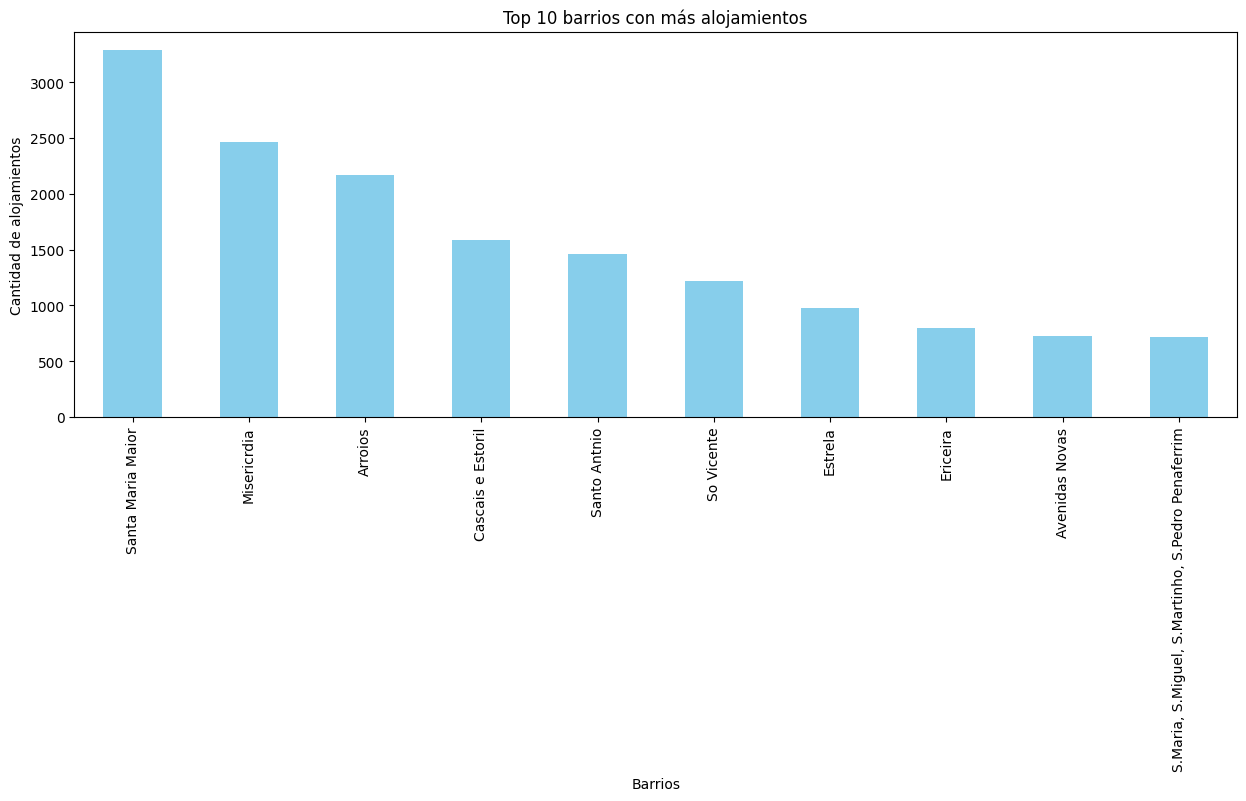

In [64]:
# Graficar el top 10 de barrios con más alojamientos

df_listingdetail['neighbourhood_cleansed'].value_counts().head(10).plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Top 10 barrios con más alojamientos')
plt.xlabel('Barrios')
plt.ylabel('Cantidad de alojamientos')
plt.show()

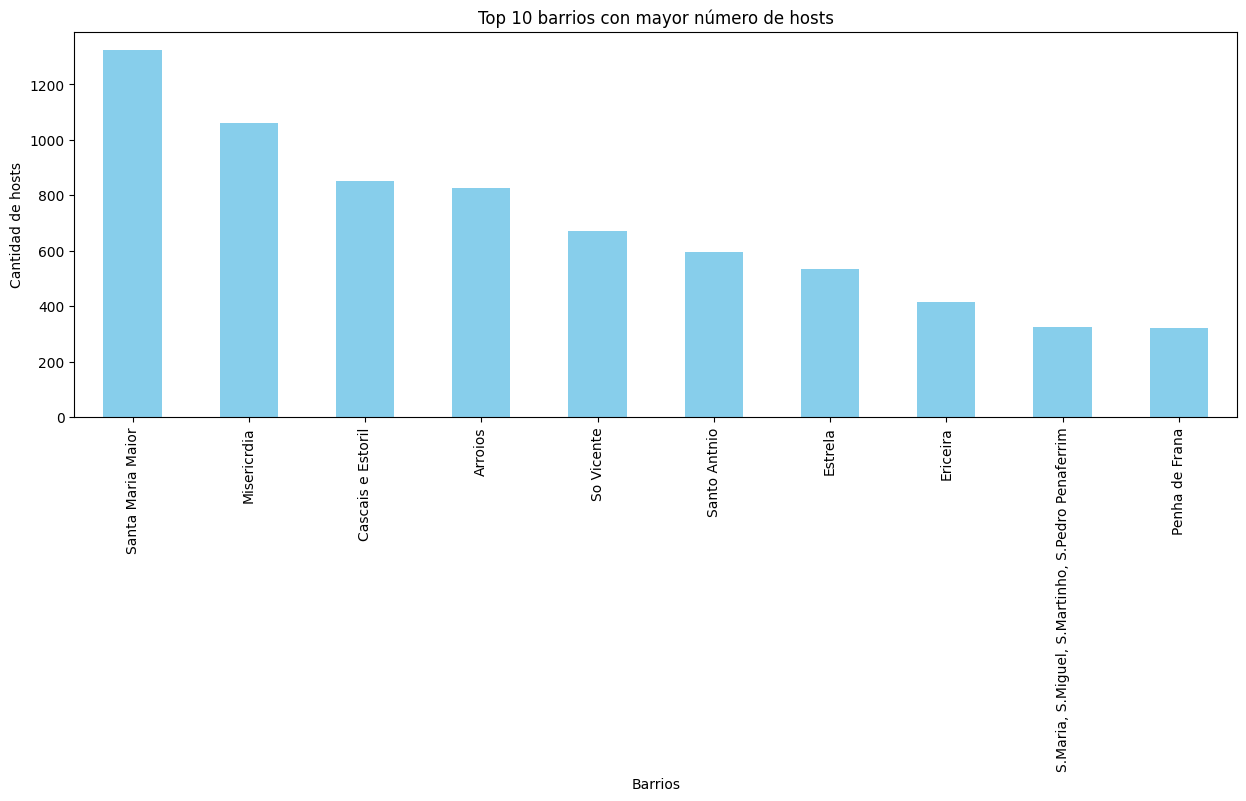

In [65]:
# Graficar el top 10 de barrios con mayor numeros de host (por host_id)

top_10_neighbourhoods_hosts = df_listingdetail.groupby('neighbourhood_cleansed')['host_id'].nunique().sort_values(ascending=False).head(10)
top_10_neighbourhoods_hosts.plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Top 10 barrios con mayor número de hosts')
plt.xlabel('Barrios')
plt.ylabel('Cantidad de hosts')
plt.show()

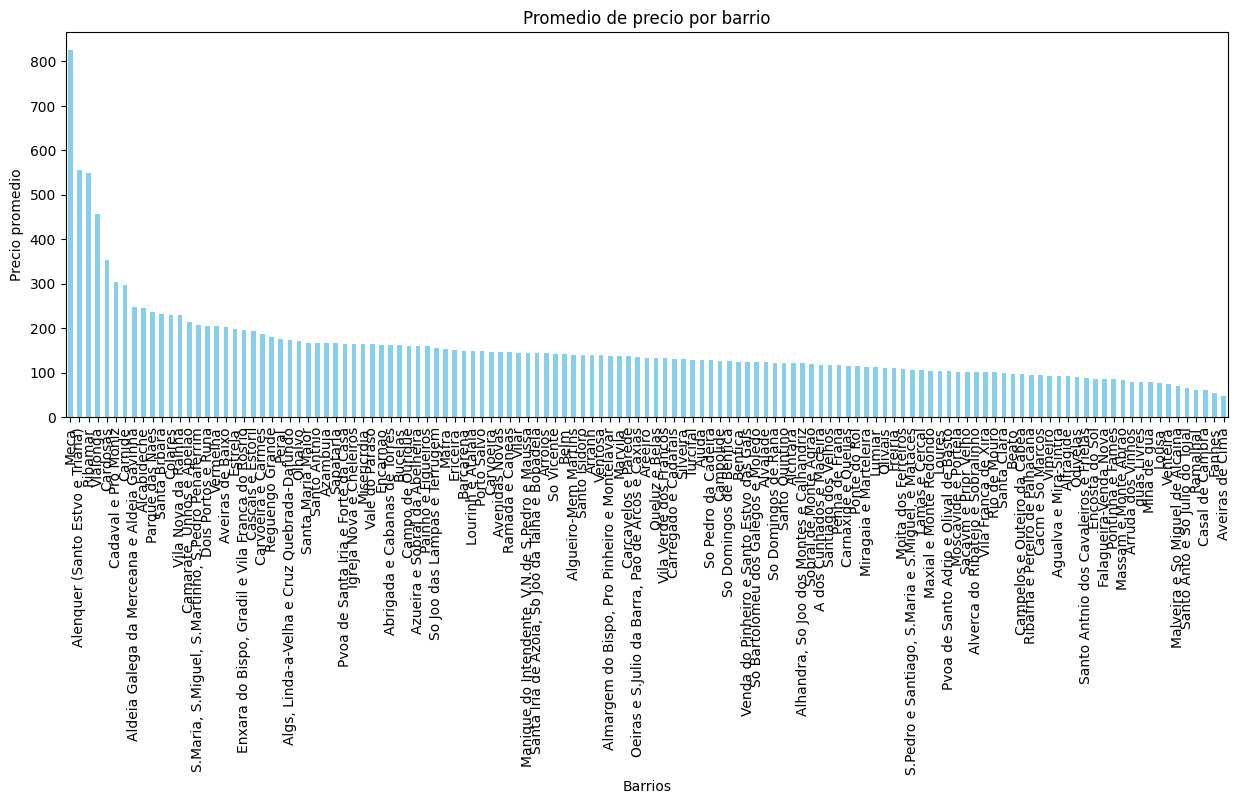

In [66]:
# Calcular el promedio de precio por barrio

average_price_neighbourhood = df_listingdetail.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
average_price_neighbourhood.plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Promedio de precio por barrio')
plt.xlabel('Barrios')
plt.ylabel('Precio promedio')
plt.show()

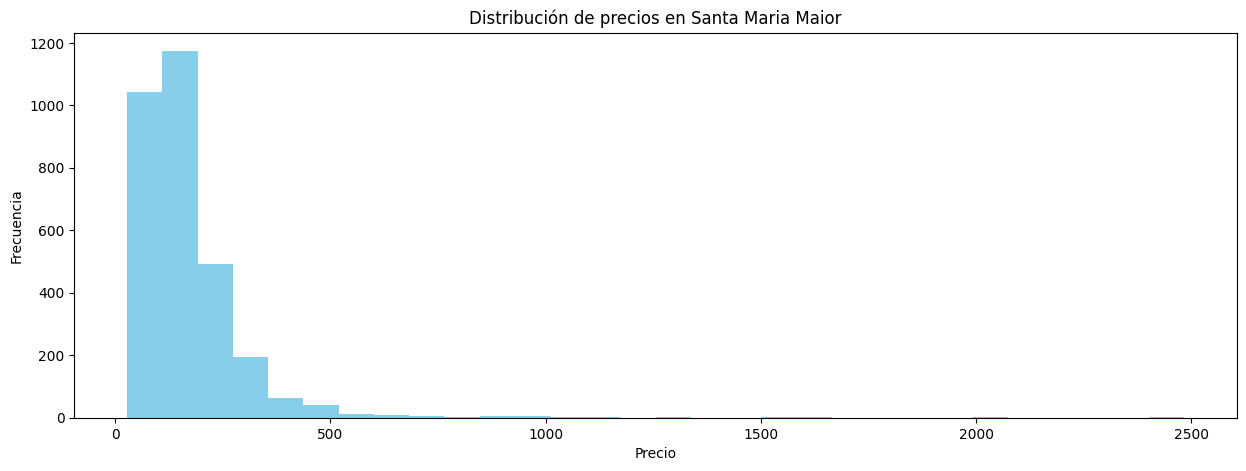

In [61]:
# Distribución de precios en Santa Maria Maior

df1 = df.listingdetail[df.listingdetail['neighbourhood_cleansed'] == 'Santa Maria Maior']
df1['price'].plot(kind='hist', bins=30, figsize=(15, 5), color='skyblue')
plt.title('Distribución de precios en Santa Maria Maior')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


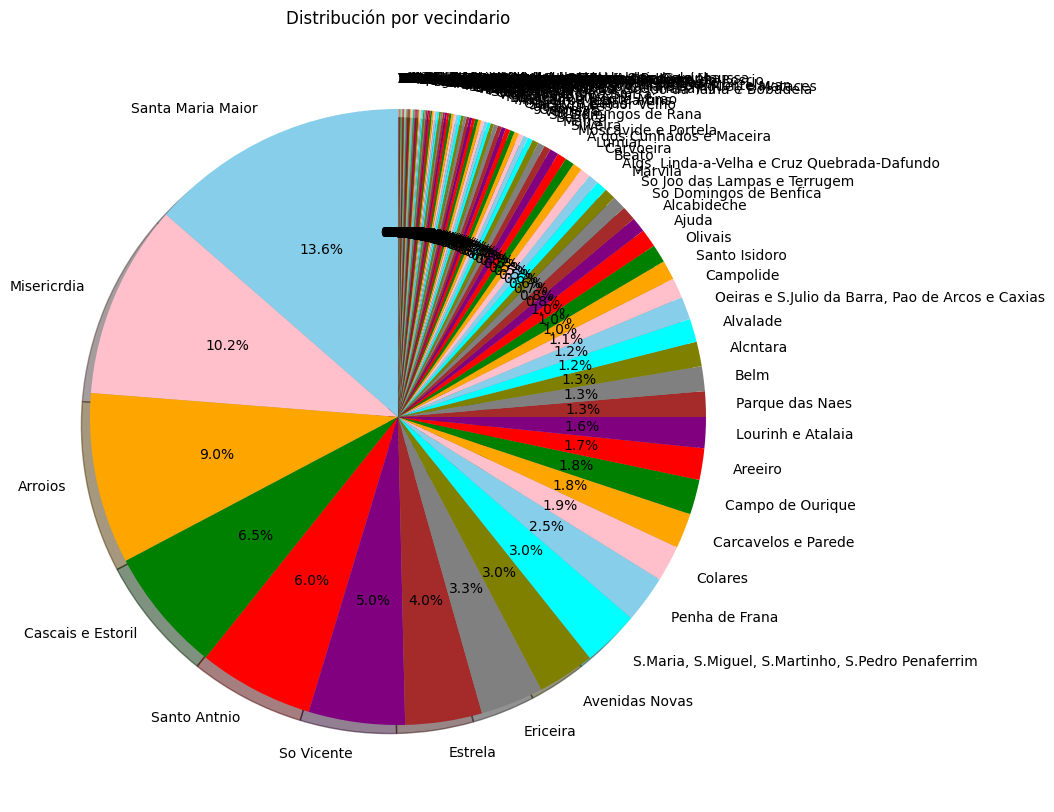

In [62]:
# Distribución por vecindario. Creamos tabla pastel

df.listingdetail['neighbourhood_cleansed'].value_counts().plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%', startangle=90, shadow=True, colors=['skyblue', 'pink', 'orange', 'green', 'red', 'purple', 'brown', 'gray', 'olive', 'cyan'])
plt.title('Distribución por vecindario')
plt.ylabel('')
plt.show()

In [69]:
# Distribución de tipos de habitaciones (gráfico horizontal)

df_listingdetail['room_type'].value_counts().plot(kind='barh', figsize=(15, 5), color='skyblue')
plt.title('Distribución de tipos de habitaciones')
plt.xlabel('Cantidad de alojamientos')
plt.ylabel('Tipo de habitación')
plt.show()

NameError: name 'df' is not defined

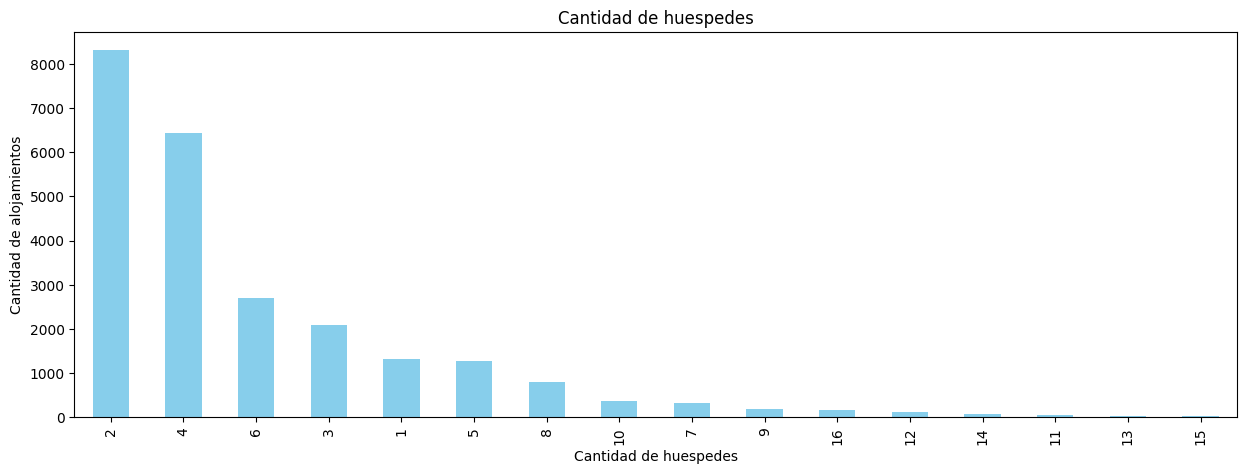

In [66]:
# Cantidad de huespedes

df.listingdetail['accommodates'].value_counts().plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Cantidad de huespedes')
plt.xlabel('Cantidad de huespedes')
plt.ylabel('Cantidad de alojamientos')
plt.show()


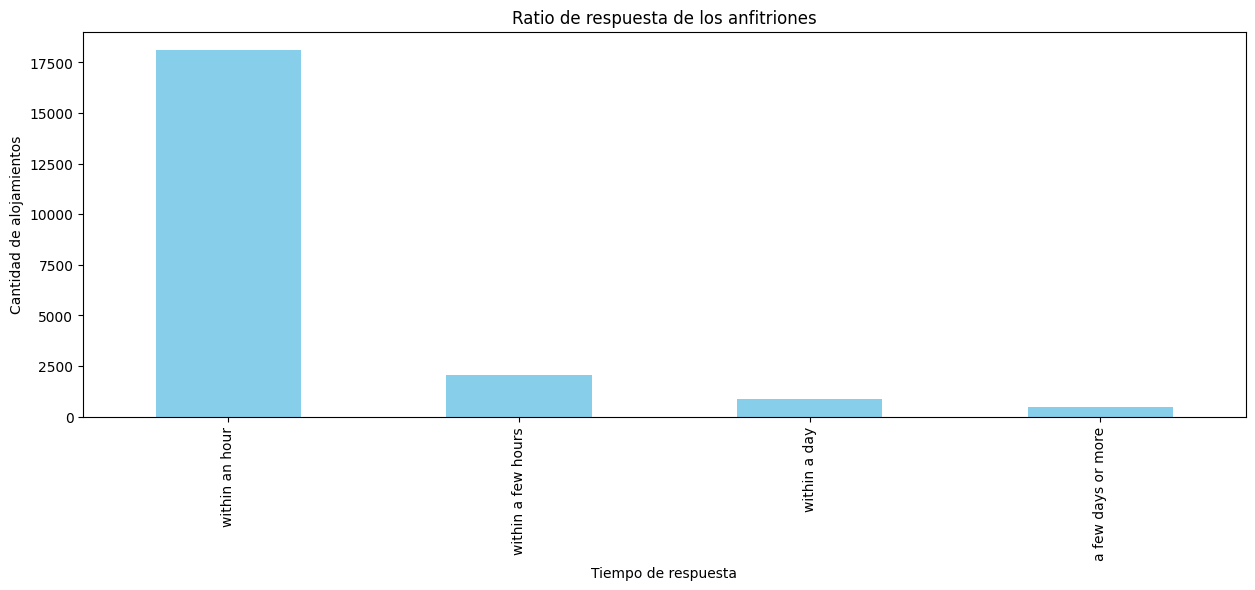

In [68]:
# Ratio de respuesta de los anfitriones

df.listingdetail['host_response_time'].value_counts().plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Ratio de respuesta de los anfitriones')
plt.xlabel('Tiempo de respuesta')
plt.ylabel('Cantidad de alojamientos')
plt.show()

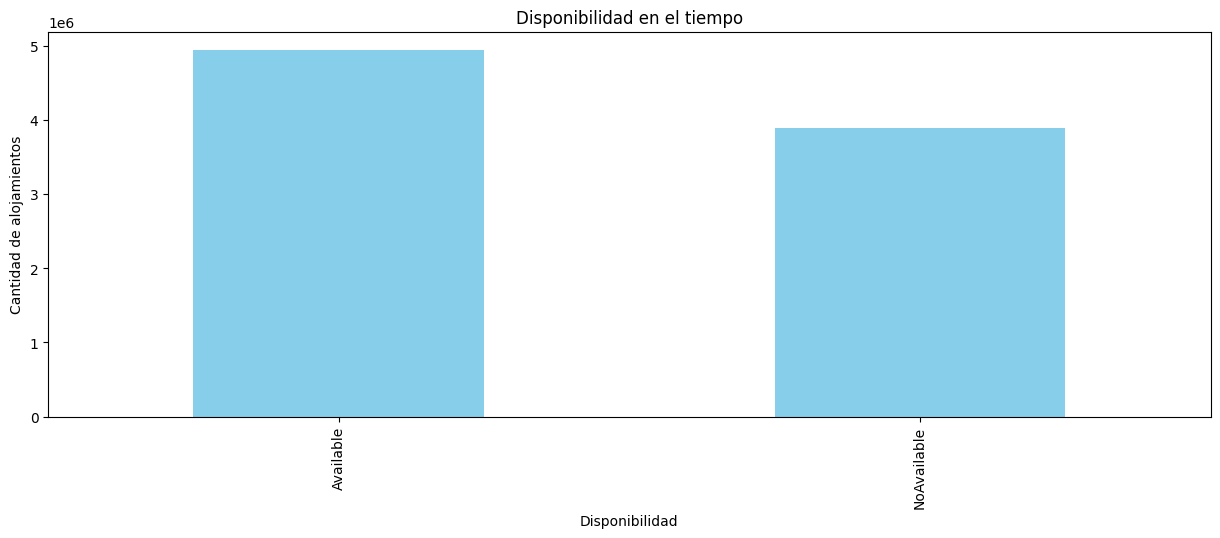

In [69]:
# Disponibilidad en el tiempo

df.calendario['available'].value_counts().plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title('Disponibilidad en el tiempo')
plt.xlabel('Disponibilidad')
plt.ylabel('Cantidad de alojamientos')
plt.show()

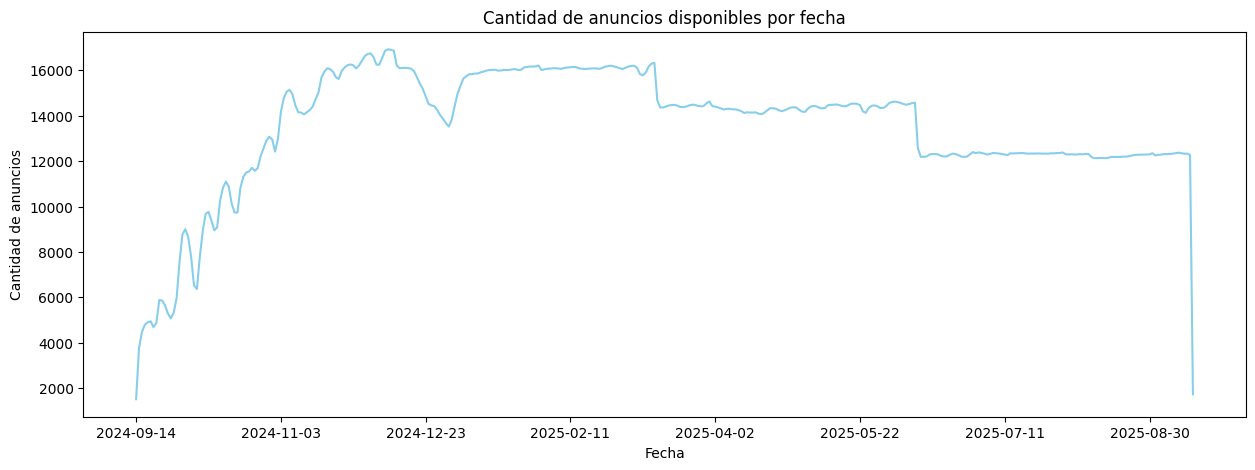

In [71]:
# Filtrar los anuncios disponibles
df_available = df.calendario[df.calendario['available'] == 'Available']

# Contar la cantidad de anuncios por fecha y ordenar por fecha
df_available_count = df_available['date'].value_counts().sort_index()

# Graficar la cantidad de anuncios por fecha
df_available_count.plot(kind='line', figsize=(15, 5), color='skyblue')
plt.title('Cantidad de anuncios disponibles por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de anuncios')
plt.show()


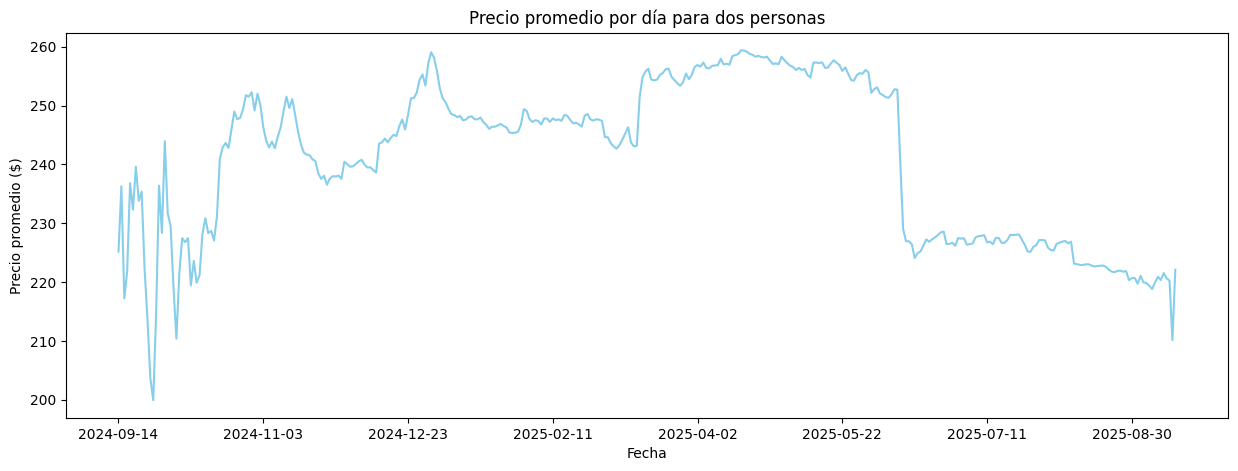

In [72]:
# Precio medio por dia para dos personas, graficar el precio promedio por dia ordenando el tiempo de más antiguo a más reciente

# Filtrar los anuncios disponibles con precios no nulos
df2 = df_available[df_available['price'].notnull()]

# Convertir la columna 'price' a tipo float
df2['price'] = df2['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Calcular el precio promedio por día
precio_promedio_por_dia = df2.groupby('date')['price'].mean()

# Graficar el precio promedio por día
precio_promedio_por_dia.plot(kind='line', figsize=(15, 5), color='skyblue')
plt.title('Precio promedio por día para dos personas')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio ($)')
plt.show()

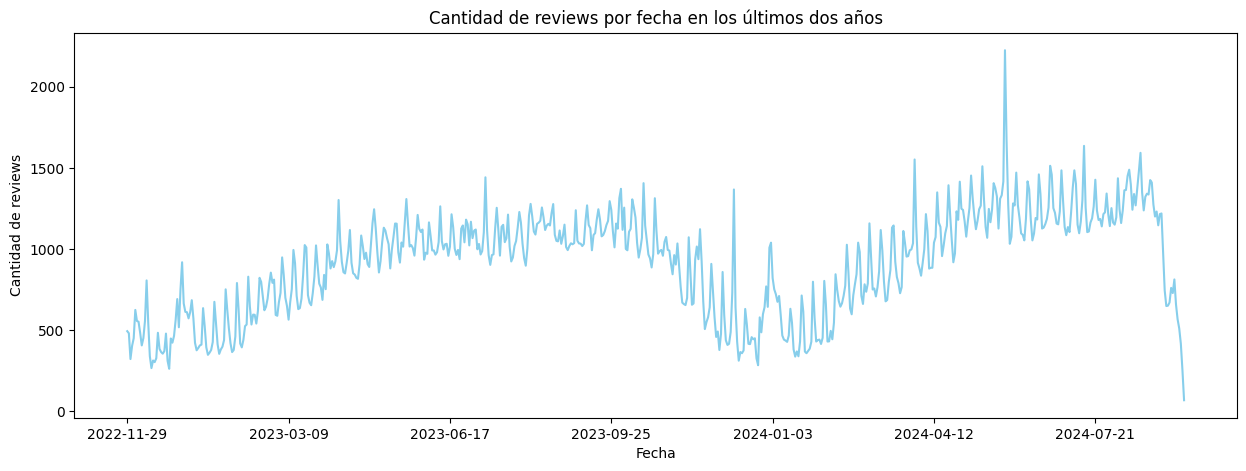

In [74]:
# Analisis de las reviews en los ultimos dos años

# Filtrar las reviews de los últimos dos años
df_reviews_last_two_years = df.reviewsdetail[df.reviewsdetail['date'] >= (pd.to_datetime('today') - pd.DateOffset(years=2)).strftime('%Y-%m-%d')]

# Contar la cantidad de reviews por fecha y ordenar por fecha
df_reviews_count_last_two_years = df_reviews_last_two_years['date'].value_counts().sort_index()

# Graficar la cantidad de reviews por fecha
df_reviews_count_last_two_years.plot(kind='line', figsize=(15, 5), color='skyblue')
plt.title('Cantidad de reviews por fecha en los últimos dos años')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de reviews')
plt.show()

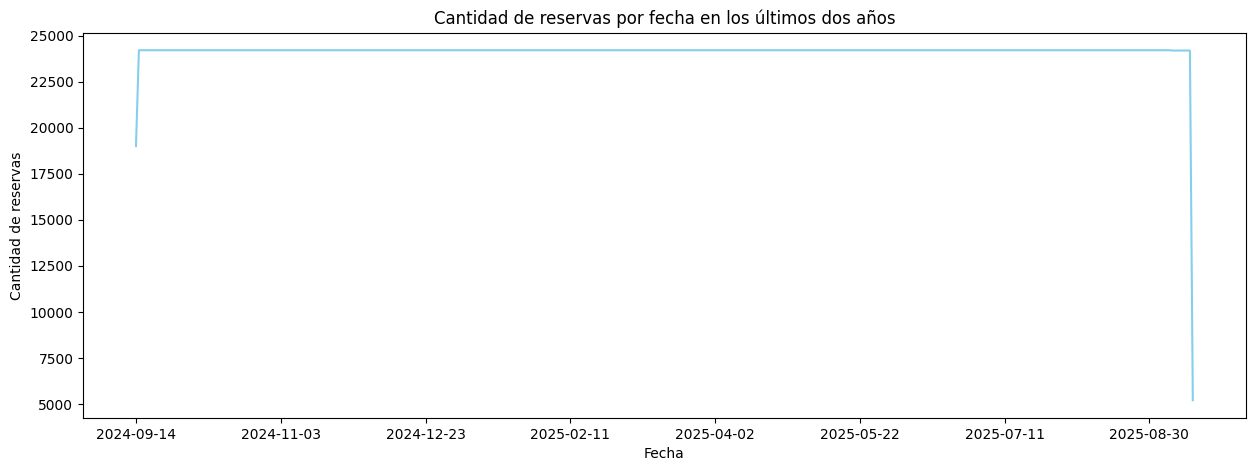

In [76]:
# Cantidad de reserva en los ultimos dos años por fecha

# Filtrar las reservas de los últimos dos años
df_reservas_last_two_years = df.calendario[df.calendario['date'] >= (pd.to_datetime('today') - pd.DateOffset(years=2)).strftime('%Y-%m-%d')]

# Contar la cantidad de reservas por fecha y ordenar por fecha
df_reservas_count_last_two_years = df_reservas_last_two_years['date'].value_counts().sort_index()

# Graficar la cantidad de reservas por fecha
df_reservas_count_last_two_years.plot(kind='line', figsize=(15, 5), color='skyblue')
plt.title('Cantidad de reservas por fecha en los últimos dos años')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de reservas')
plt.show()

In [ ]:
 = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/calendar.csv.gz', compression='gzip')
 = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/reviews.csv')
 = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/reviews.csv.gz', compression='gzip')
df.neighbourhoods = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/neighbourhoods.csv')
df.listing = pd.read_csv('/Users/jaquelinedicroce/Desktop/Bootcamp/modulo_2/Proyecto_2/Github/ProyectoAirbnb_SegundoModulo/Data/listings.csv')
df.listingdetail = pd

In [79]:
df.calendario.to_csv('calendario.csv', index=False)


In [80]:
df.reviews.to_csv('reviews.csv', index=False)

In [81]:
df.reviewsdetail.to_csv('reviewsdetail.csv', index=False)

In [82]:
df.neighbourhoods.to_csv('neighbourhoods.csv', index=False)

In [83]:
df.listing.to_csv('listing.csv', index=False)

In [100]:
df.listingdetail.to_csv('listingdetail.csv', index=False)